# Required Imports

In [1]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install datasets

Note: you may need to restart the kernel to use updated packages.


In [4]:
from datasets import load_dataset
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
import ssl
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Embedding
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


import keras
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import os

# Preprocessing

In [5]:
# downloads the stop words
try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\redto\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
pip install -U datasets

Note: you may need to restart the kernel to use updated packages.


In [7]:
dataset = load_dataset("yelp_review_full")
dp_train = dataset['train'].to_pandas()
dp_test = dataset['test'].to_pandas()
dp_train

Generating train split:   0%|          | 0/650000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/50000 [00:00<?, ? examples/s]

,label,text
0,4,dr. goldberg offers everything i look for in a...
1,1,"Unfortunately, the frustration of being Dr. Go..."
2,3,Been going to Dr. Goldberg for over 10 years. ...
3,3,Got a letter in the mail last week that said D...
4,0,I don't know what Dr. Goldberg was like before...
...,...,...
649995,4,I had a sprinkler that was gushing... pipe bro...
649996,0,Phone calls always go to voicemail and message...
649997,0,Looks like all of the good reviews have gone t...
649998,4,I was able to once again rely on Yelp to provi...


In [8]:
# preprocesss the text data by removing stop words and leading spaces
# this data pre-process method was inspired by: https://www.kaggle.com/code/gcdatkin/gru-hotel-rating-prediction

def pre_process_data(X):
    stop_words = stopwords.words('english')
    X = re.sub(r'\d+', ' ', X)
    X = X.split()
    X = " ".join([word for word in X if word.lower().strip() not in stop_words])
    return X

In [9]:
reviews = dp_train['text'].apply(pre_process_data)
reviews

0         dr. goldberg offers everything look general pr...
1         Unfortunately, frustration Dr. Goldberg's pati...
2         going Dr. Goldberg years. think one st patient...
3         Got letter mail last week said Dr. Goldberg mo...
4         know Dr. Goldberg like moving Arizona, let tel...
                                ...                        
649995    sprinkler gushing... pipe broken way ground, t...
649996    Phone calls always go voicemail messages retur...
649997    Looks like good reviews gone head place! Jason...
649998    able rely Yelp provide needed response leaking...
649999    using company months. Ryan would come every we...
Name: text, Length: 650000, dtype: object

In [10]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(reviews)

sequences = tokenizer.texts_to_sequences(reviews)

In [11]:
# get the length of the largest sequnces
max_length = np.max(list(map(lambda x: len(x), sequences)))

# pads all the inputs to be the same length of the max length
print("The max length is ", max_length)
inputs = pad_sequences(sequences, maxlen=max_length, padding = 'post')

labels = np.array(dp_train['label'])
X_train, X_test, y_train, y_test = train_test_split(inputs, labels, train_size=0.80, random_state=100)

The max length is  1166


# Create and Train MLP Model

In [12]:
# Tensorflow mlp was inspired from their website
# https://www.tensorflow.org/guide/core/mlp_core and #https://www.geeksforgeeks.org/multi-layer-perceptron-learning-in-tensorflow

# We want to use an embedding so the neural network is better able to differniate words

model = Sequential([
    #sets the input to be the size of the text (which is the max-length)
    Flatten(input_shape= (max_length, )),

    Dense(256, activation = 'relu'),
    Dense(256, activation = 'relu'),
    Dense(256, activation = 'relu'),
    Dense(256, activation = 'relu'),

    #output layer
    Dense(5, activation = 'softmax'),
])

optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer = optimizer, loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [13]:
model.fit(X_train, y_train, epochs = 10)

Epoch 1/10
16250/16250 [==============================] - 216s 13ms/step - loss: 21.4731 - accuracy: 0.2000
Epoch 2/10
16250/16250 [==============================] - 221s 14ms/step - loss: 1.7506 - accuracy: 0.2054
Epoch 3/10
16250/16250 [==============================] - 213s 13ms/step - loss: 1.6153 - accuracy: 0.2004
Epoch 4/10
16250/16250 [==============================] - 217s 13ms/step - loss: 1.6096 - accuracy: 0.1992
Epoch 5/10
16250/16250 [==============================] - 219s 13ms/step - loss: 1.6095 - accuracy: 0.1997
Epoch 6/10
16250/16250 [==============================] - 223s 14ms/step - loss: 1.6095 - accuracy: 0.1999
Epoch 7/10
16250/16250 [==============================] - 227s 14ms/step - loss: 1.6095 - accuracy: 0.2007
Epoch 8/10
16250/16250 [==============================] - 227s 14ms/step - loss: 1.6097 - accuracy: 0.1991
Epoch 9/10
16250/16250 [==============================] - 226s 14ms/step - loss: 1.6098 - accuracy: 0.1999
Epoch 10/10
16250/16250 [===========

In [14]:
tf.saved_model.save(model, "/Users/redto/Documents")

INFO:tensorflow:Assets written to: /Users/redto/Documents\assets


# Evaluate Model

In [15]:
test_reviews = dp_test['text'].apply(pre_process_data)
test_reviews

0        got 'new' tires within two weeks got flat. too...
1        waste time. two different people come house gi...
2        say worst! people place lunch, place freezing ...
3        restaurant twice disappointed times. go back. ...
4        Food GOOD all! husband & ate couple weeks ago ...
                               ...                        
49995    wanted write review chip others said. would re...
49996    Great ambience. Great drinks. Great food. love...
49997    Monks locations excited heard coming Sun Prair...
49998    go here. know might want try good reviews peop...
49999    Buffet recently open renovation husband thinki...
Name: text, Length: 50000, dtype: object

In [19]:
sequences = tokenizer.texts_to_sequences(test_reviews)

#max_length = np.max(list(map(lambda x: len(x), sequences)))
#print(max_length)

# pads all the inputs to be the same length of the max length
test_inputs = pad_sequences(sequences, maxlen=1166, padding = 'post')
test_inputs

array([[   17, 27410,  2237, ...,     0,     0,     0],
       [  820,     8,    46, ...,     0,     0,     0],
       [   65,   352,    28, ...,     0,     0,     0],
       ...,
       [29386,  1220,   641, ...,     0,     0,     0],
       [   12,    63,    41, ...,     0,     0,     0],
       [  235,   727,   236, ...,     0,     0,     0]])

In [20]:
y_test = np.asarray(dp_test['label'])
print(y_test.shape)
print(test_inputs.shape)

(50000,)
(50000, 1166)


In [21]:
# Evaluate already displays loss and accuracy metrics
result = model.evaluate(test_inputs, y_test)

1563/1563 [==============================] - 15s 10ms/step - loss: 1.6094 - accuracy: 0.2003


In [31]:
# Predict only generates class labels --> need these for accuracy and confusion matrix
predict_test = model.predict(test_inputs)

1563/1563 [==============================] - 11s 7ms/step


In [23]:
# Shows summary of current state of model
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 1166)              0         
                                                                 
 dense (Dense)               (None, 256)               298752    
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dense_2 (Dense)             (None, 256)               65792     
                                                                 
 dense_3 (Dense)             (None, 256)               65792     
                                                                 
 dense_4 (Dense)             (None, 5)                 1285      
                                                                 
Total params: 497,413
Trainable params: 497,413
Non-trai

In [24]:
# Displays loss and accuracy
dict(zip(model.metrics_names, result))

{'loss': 1.6093993186950684, 'accuracy': 0.20032000541687012}

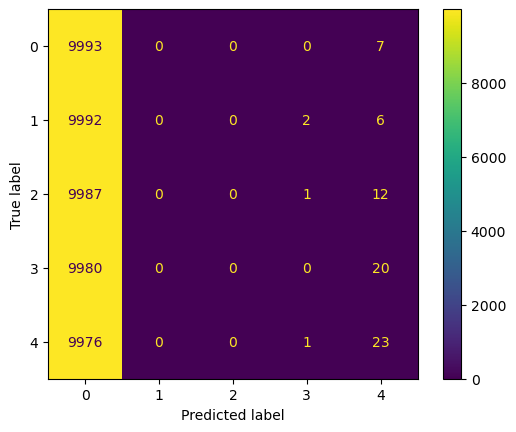

In [41]:
# Displays a confusion matrix based on the predicted vs actual values
y_prediction = np.argmax(predict_test, axis = 1)
cm = confusion_matrix(y_test, y_prediction)
ConfusionMatrixDisplay(cm).plot()

In [46]:
from sklearn.metrics import f1_score
f1_score(y_test, y_prediction, average='weighted')
# weighted f1 score so that the support (number of instances of a class) is taken into account.

0.06761382630153404